<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       267
unique      189
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616,39693,39703,39799,39870,39928,39994,40026,40073,40141,40200,40287,40357,40510,40626,40687,40768,40833,40937
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899,15066,15231,15399,15570,15752,15955,16212,16501,16774,17055,17350,17651,17948,18250,18556,18858,19157,19445
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658,52804,52940,53072,53325,53399,53584,53777,53998,54203,54402,54616,54829,55081,55357,55630,55880,56143,56419
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568,2696,2696,2696,2995,2995,3190,3190,3377,3377,3377,3623,3623,3811,3811,4038,4038,4038,4325
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958,6031,6246,6366,6488,6680,6846,7096,7222,7462,7622,7829,8049,8338,8582,8829,9026,9381,9644


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02
mean,2.078652,2.449438,3.524345,5.370787,7.932584,10.962547,20.891386,23.097378,30.842697,37.179775,45.086142,62.872659,74.483146,89.505618,103.531835,115.367041,128.823970,139.063670,150.411985,160.183521,167.831461,169.397004,226.149813,250.595506,258.617978,266.797753,274.419476,281.468165,283.340824,285.438202,287.794007,294.389513,295.812734,297.925094,301.119850,304.779026,309.872659,315.059925,322.149813,331.074906,...,1.130505e+05,1.142620e+05,1.153150e+05,1.162168e+05,1.173381e+05,1.183840e+05,1.193843e+05,1.207364e+05,1.219737e+05,1.230130e+05,1.239128e+05,1.249506e+05,1.260144e+05,1.272392e+05,1.284279e+05,1.295345e+05,1.307330e+05,1.316614e+05,1.328975e+05,1.341085e+05,1.354166e+05,1.367629e+05,1.381145e+05,1.393538e+05,1.403593e+05,1.415810e+05,1.428110e+05,1.442365e+05,1.457596e+05,1.473001e+05,1.485799e+05,1.496466e+05,1.512941e+05,1.527469e+05,1.544089e+05,1.561642e+05,1.580621e+05,1.596009e+05,1.610139e+05,1.628613e+05
std,27.228175,27.326766,34.019598,47.346836,66.166252,89.148259,218.779113,220.114337,303.331721,359.626725,442.541298,687.750036,831.398832,1024.665511,1207.495280,1357.387445,1531.256515,1662.719405,1817.503035,1945.759712,2045.978450,2046.318265,2952.501495,3331.464167,3444.205426,3562.425660,3672.924217,3776.452161,3797.821948,3822.939039,3836.463549,3923.381009,3923.419241,3935.905743,3966.462846,3991.174763,4016.752540,4037.184565,4064.982041,4102.116677,...,5.945163e+05,6.008971e+05,6.068185e+05,6.117751e+05,6.170945e+05,6.225774e+05,6.272813e+05,6.340558e+05,6.401608e+05,6.459273e+05,6.507718e+05,6.552406e+05,6.607825e+05,6.666460e+05,6.725033e+05,6.777466e+05,6.841853e+05,6.886500e+05,6.931913e+05,6.988132e+05,7.047597e+05,7.105764e+05,7.165384e+05,7.223189e+05,7.270349e+05,7.313578e+05,7.363275e+05,7.421990e+05,7.481833e+05,7.543880e+05,7.597930e+05,7.639973e+05,7.693751e+05,7.747684e+05,7.804428e+05,7.864898e+05,7.931235e+05,7.992935e+05,8.038858e+05,8.094923e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

8702750

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

243

In [7]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat                    40
Long                 -100
1/22/20                 1
                   ...   
10/22/20          8407702
10/23/20          8491459
10/24/20          8575177
10/25/20          8635966
10/26/20          8702750
Name: 243, Length: 283, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
243,NaN,US,40.0,-100.0,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,6681372,6730088,6774138,6810352,6862816,6901781,6940214,6984346,7034931,7079803,7116225,7149537,7191637,7233042,7277791,7332297,7382341,7417845,7457402,7499341,7549682,7605873,7663293,7717932,7762546,7804199,7856605,7916099,7979709,8048865,8106384,8154594,8212981,8273296,8336031,8407702,8491459,8575177,8635966,8702750


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,935,935,935,935,935,935,935,936,936,936,936,936,936,936,936,936,936,936,936,936,936,936,936,936,937,937,937,937,937,937,937,937,938,938,938,938,940,940,940,941
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,584,584,584,584,584,584,584,584,584,584,584,584,584,584,585,585,585,585,585,585,585,585,585,585,585,585,585,585,586,586,586,586,587,587,587,589,589,589,589,589
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,393,394,395,396,396,396,396,396,397,401,403,404,409,409,411,411,411,413,413,413,413,414,414,415,416,416,416,416,417,417,417,417,418,419,420,427,429,429,430,431
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170,170
61,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1787,1793,1797,1800,1803,1807,1807,1809,1812,1814,1819,1819,1827,1827,1831,1834,1840,1841,1846,1848,1848,1851,1852,1858,1861,1863,1869,1873,1875,1877,1881,1884,1889,1892,1895,1895,1904,1907,1908,1909
62,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,258,258,258,258,258,258,259,259,259,259,259,259,259,259,259,259,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260
63,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
64,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
65,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,365,367,367,367,368,368,368,368,368,368,368,368,368,368,368,369,371


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
143,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,5214677,5308014,5400619,5487580,5562663,5646010,5732518,5818570,5903932,5992532,6074702,6145291,6225763,6312584,6394068,6473544,6549373,6623815,6685082,6757131,6835655,6906151,6979423,7053806,7120538,7175880,7239389,7307097,7370468,7432680,7494551,7550273,7597063,7651107,7706946,7761312,7814682,7864811,7909959,7946429


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20
143,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,...,5214677,5308014,5400619,5487580,5562663,5646010,5732518,5818570,5903932,5992532,6074702,6145291,6225763,6312584,6394068,6473544,6549373,6623815,6685082,6757131,6835655,6906151,6979423,7053806,7120538,7175880,7239389,7307097,7370468,7432680,7494551,7550273,7597063,7651107,7706946,7761312,7814682,7864811,7909959,7946429


## Converting to np array

In [12]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 271)

In [14]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([      1,       1,       1,       2,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       5,      28,
            30,      31,      34,      39,      43,      56,      62,
            73,      82,     102,     113,     119,     142,     156,
           194,     244,     330,     396,     499,     536,     657,
           727,     887,     987,    1024,    1251,    1397,    1998,
          2543,    2567,    3082,    3588,    4778,    5311,    5916,
          6725,    7598,    8446,    9205,   10453,   11487,   12322,
         13430,   14352,   15722,   17615,   18539,   20080,   21370,
         23077,   24530,   26283,   27890,   29451,   31324,   33062,
         34863,   37257,   39699,   42505,   46437,   49400,   52987,
         56351,   59

## Visualisation of the data

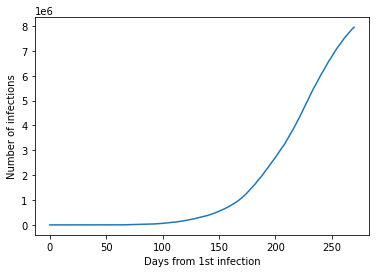

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
y_infections_india = counts_np
y_infections_india

array([      1,       1,       1,       2,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       3,       3,       3,
             3,       3,       3,       3,       5,       5,      28,
            30,      31,      34,      39,      43,      56,      62,
            73,      82,     102,     113,     119,     142,     156,
           194,     244,     330,     396,     499,     536,     657,
           727,     887,     987,    1024,    1251,    1397,    1998,
          2543,    2567,    3082,    3588,    4778,    5311,    5916,
          6725,    7598,    8446,    9205,   10453,   11487,   12322,
         13430,   14352,   15722,   17615,   18539,   20080,   21370,
         23077,   24530,   26283,   27890,   29451,   31324,   33062,
         34863,   37257,   39699,   42505,   46437,   49400,   52987,
         56351,   59

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [19]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[      0,       1,       2,       3,       4,       5,       6,
              7,       8,       9,      10,      11,      12,      13,
             14,      15,      16,      17,      18,      19,      20,
             21,      22,      23,      24,      25,      26,      27,
             28,      29,      30,      31,      32,      33,      34,
             35,      36,      37,      38,      39,      40,      41,
             42,      43,      44,      45,      46,      47,      48,
             49,      50,      51,      52,      53,      54,      55,
             56,      57,      58,      59,      60,      61,      62,
             63,      64,      65,      66,      67,      68,      69,
             70,      71,      72,      73,      74,      75,      76,
             77,      78,      79,      80,      81,      82,      83,
             84,      85,      86,      87,      88,      89,      90,
             91,      92,      93,      94,      95,      96,      97,
      

In [21]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([(  0,       1), (  1,       1), (  2,       2), (  3,       2),
       (  4,       5), (  5,       5), (  6,       5), (  7,       6),
       (  8,       6), (  9,       8), ( 10,       8), ( 11,       8),
       ( 12,      11), ( 13,      11), ( 14,      11), ( 15,      12),
       ( 16,      12), ( 17,      12), ( 18,      12), ( 19,      12),
       ( 20,      13), ( 21,      13), ( 22,      14), ( 23,      14),
       ( 24,      14), ( 25,      14), ( 26,      14), ( 27,      14),
       ( 28,      14), ( 29,      14), ( 30,      16), ( 31,      16),
       ( 32,      16), ( 33,      16), ( 34,      16), ( 35,      16),
       ( 36,      17), ( 37,      17), ( 38,      25), ( 39,      32),
       ( 40,      55), ( 41,      74), ( 42,     107), ( 43,     184),
       ( 44,     237), ( 45,     403), ( 46,     519), ( 47,     594),
       ( 48,     782), ( 49,    1147), ( 50,    1586), ( 51,    2219),
       ( 52,    2978), ( 53,    3212), ( 54,    4679), ( 55,    6511),
      

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
